In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras

## simple linear regression without bias

In [2]:
x = np.array([10, 15, 60])
y = np.array([6.2, 9.3, 37.3])
x = x.reshape(-1, 1)
model = LinearRegression(fit_intercept=False)
model.fit(x, y)
print(model.coef_)
model.predict([[15]])

[0.62152866]


array([9.32292994])

## linear regression with bias

In [3]:
# Celsius
x = np.array([-40, -10,  0,  8, 15, 22], dtype=float).reshape(-1, 1)
# Fahrenheit
y = np.array([-40,  14, 32, 46, 59, 72],  dtype=float)
model_bias = LinearRegression(fit_intercept=True)
model_bias.fit(x, y)
print(model_bias.coef_)
print(model_bias.intercept_)

[1.80226828]
32.00189023155337


## Linear model with `keras`

In [2]:
# Celsius
x = np.array([-40, -10,  0,  8, 15, 22], dtype=float).reshape(-1, 1)
# Fahrenheit
y = np.array([-40,  14, 32, 46, 59, 72],  dtype=float)
model = keras.models.Sequential()
# number of neurons, observations (1 dimension)
model.add(keras.layers.Dense(1, input_shape=(1,)))

opt = keras.optimizers.SGD(learning_rate=0.002)
model.compile(optimizer=opt, loss='mean_squared_error')

history = model.fit(x, y, epochs=800)

Epoch 1/800
1/1 [==============================] - 1s 515ms/step - loss: 4588.5571
Epoch 2/800
1/1 [==============================] - 0s 6ms/step - loss: 2515.0535
Epoch 3/800
1/1 [==============================] - 0s 5ms/step - loss: 1637.9141
Epoch 4/800
1/1 [==============================] - 0s 7ms/step - loss: 1264.2133
Epoch 5/800
1/1 [==============================] - 0s 5ms/step - loss: 1102.3854
Epoch 6/800
1/1 [==============================] - 0s 6ms/step - loss: 1029.7455
Epoch 7/800
1/1 [==============================] - 0s 5ms/step - loss: 994.6702
Epoch 8/800
1/1 [==============================] - 0s 6ms/step - loss: 975.4370
Epoch 9/800
1/1 [==============================] - 0s 4ms/step - loss: 962.9056
Epoch 10/800
1/1 [==============================] - 0s 5ms/step - loss: 953.2295
Epoch 11/800
1/1 [==============================] - 0s 4ms/step - loss: 944.7898
Epoch 12/800
1/1 [==============================] - 0s 3ms/step - loss: 936.9053
Epoch 13/800
1/1 [===========

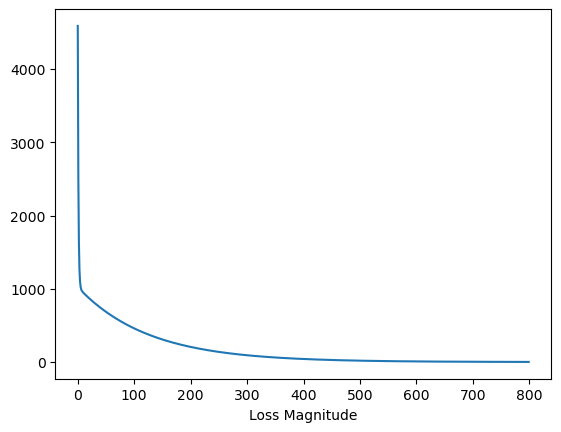

In [6]:
plt.xlabel('Epoch Number')
plt.xlabel('Loss Magnitude')
plt.plot(history.history['loss'])
plt.show()

In [8]:
model.predict([[75]])

1/1 [==============================] - 0s 85ms/step


array([[165.67047]], dtype=float32)

## predict weather data

In [23]:
df = pd.read_csv('../data/RUB_Weather.csv')
df.head()

df['Datum'] = pd.to_datetime(df['Datum'], format='%d/%m/%Y')
df['doy'] = df['Datum'].dt.dayofyear
# no NA allowed
df.dropna(inplace=True)
# we use doy
df.drop(['Datum'], axis=1, inplace=True)
# we want to predict this later on
x = df.drop(['relhum_mean_all'], axis=1)
y = df['relhum_mean_all']
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=43,
    shuffle=True,
)
input_size = x_train.shape[1]

### normalize data

In [24]:
layer = keras.layers.experimental.preprocessing.Normalization()
layer.adapt(x_train)

### build and train the model

In [61]:
model = keras.models.Sequential()
model.add(
    keras.layers.Dense(
        128,
        activation='sigmoid',
        input_shape=(input_size,),
    ),
)
model.add(keras.layers.Dense(256, activation='sigmoid'))
model.add(keras.layers.Dense(1))

opt = keras.optimizers.SGD(learning_rate=0.004)
model.compile(optimizer=opt, loss='mean_squared_error')

history = model.fit(x_train, y_train, epochs=400, batch_size=69)

Epoch 1/400
5/5 [==============================] - 0s 3ms/step - loss: 1733.1617
Epoch 2/400
5/5 [==============================] - 0s 4ms/step - loss: 127.8079
Epoch 3/400
5/5 [==============================] - 0s 4ms/step - loss: 121.1789
Epoch 4/400
5/5 [==============================] - 0s 4ms/step - loss: 121.6760
Epoch 5/400
5/5 [==============================] - 0s 4ms/step - loss: 123.0098
Epoch 6/400
5/5 [==============================] - 0s 3ms/step - loss: 128.6335
Epoch 7/400
5/5 [==============================] - 0s 4ms/step - loss: 122.8335
Epoch 8/400
5/5 [==============================] - 0s 4ms/step - loss: 125.2825
Epoch 9/400
5/5 [==============================] - 0s 4ms/step - loss: 121.9297
Epoch 10/400
5/5 [==============================] - 0s 4ms/step - loss: 127.8659
Epoch 11/400
5/5 [==============================] - 0s 4ms/step - loss: 123.1508
Epoch 12/400
5/5 [==============================] - 0s 4ms/step - loss: 124.2617
Epoch 13/400
5/5 [==================

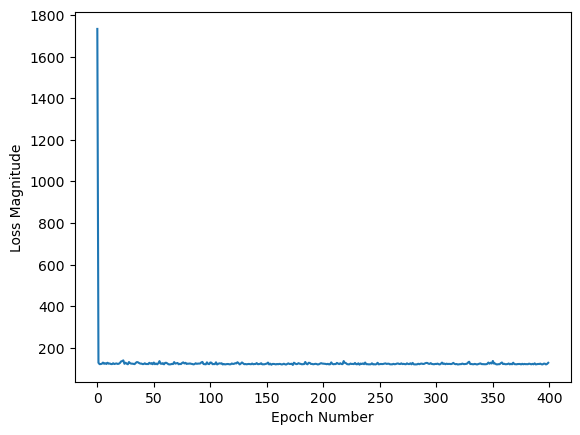

In [62]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])
plt.show()

In [64]:
position = 20
point = x_test.iloc[position].values.reshape(1, 10)
print(model.predict(point)[0, 0])
print(y_test.iloc[position])

1/1 [==============================] - 0s 31ms/step
82.93836
88.04
